In [1]:
# Just playing around again
#  lets use redshifts 0.4 - 0.6
#  snapshots: 026, 025, 024, 023 = z: 0.4, 0.47, 0.54, 0.61 (from 34 snaps)
#  can use IllustrisTNG: LH, 1P, CV, EX, BE
#  start with LH as has the most
import numpy as np
import h5py
import hdf5plugin
import matplotlib.pyplot as plt

In [2]:
# get the name of Subfind halo catalog
subhalos  = '/home/jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_026.hdf5'

In [3]:
# read halo catalogue
subh = h5py.File(subhalos, 'r')
subh.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [4]:
subh['Group'].keys()

<KeysViewHDF5 ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>

In [5]:
subh['Subhalo'].keys()

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [6]:
pos_h     = subh['Group/GroupPos'][:]/1e3   #Mpc/h
vel_h     = subh['Group/GroupVel'][:]       #km/s
SFR_h     = subh['Group/GroupSFR'][:]       #Msun/yr
mass_h    = subh['Group/GroupMass'][:]*1e10 #Msun/h
len_h     = subh['Group/GroupLen'][:]       #the total number of particles in the halo (gas+dm+stars+black_holes)
lentype_h = subh['Group/GroupLenType'][:]   #the number of particles in a halo by particle type
#subh.close()

In [7]:
index = 167 #index of the halo
print('position:',pos_h[index],'Mpc/h')
print('velocity:',vel_h[index],'km/s')
print('mass: %.3e Msun/h'%mass_h[index])
print('total length:',len_h[index],'particles')
print('number of particles by type:',lentype_h[index])

position: [15.942893  16.68846    3.9835398] Mpc/h
velocity: [-145.14125 -160.77405  -94.18773] km/s
mass: 3.263e+11 Msun/h
total length: 7176 particles
number of particles by type: [2274 4497    0    0  404    1]


#PartType0. This group contains the properties of the gas particles.

#PartType1. This group contains the properties of the dark matter particles.

#PartType4. This group contains the properties of the star particles.

#PartType5. This group contains the properties of the black hole particles.

In [18]:
# need PartType4 for stars
mass_sh = subh['Subhalo/SubhaloMass'][:]
print('Stellar mass: ', mass_sh)

mass_sh_msun = mass_sh[:] * 1e10 / 0.704
print('Stellar Mass in M sun', mass_sh_msun)

Stellar mass:  [4.2043770e+03 1.9805407e+01 3.5713192e+01 ... 1.6220157e-01 1.6220157e-01
 1.6868964e-01]
Stellar Mass in M sun [5.9721264e+13 2.8132681e+11 5.0728967e+11 ... 2.3039997e+09 2.3039997e+09
 2.3961597e+09]


In [19]:
# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
mass_sh_msol = np.log10(mass_sh[:]*1e10)
print('stellar mass in log10(M/Msol): ', mass_sh_msol)

stellar mass in log10(M/Msol):  [13.623702 11.296783 11.552829 ...  9.210055  9.210055  9.227088]


In [20]:
subh_SFR = subh['Subhalo/SubhaloSFRinRad'][:]
print('Star formation rate Msun/year', subh_SFR)

Star formation rate Msun/year [3.7453058 0.        1.5754815 ... 0.        0.        0.       ]


Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

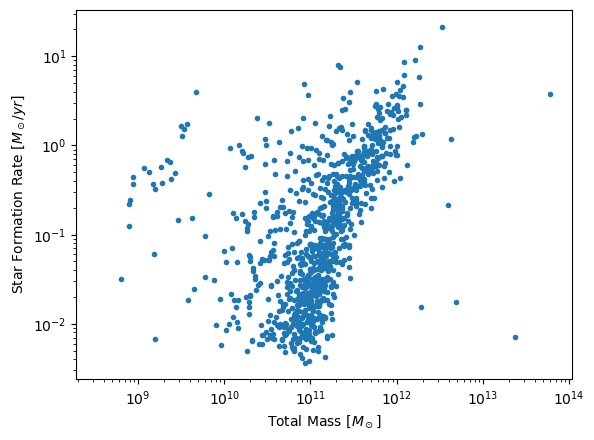

In [21]:
plt.plot(mass_sh_msun,subh_SFR,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')